In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/BhargavArunkumar/ExploratoryDataAnalysis/main/IPL%20Analysis/Ipl_data/ipl_data.csv'

In [3]:
columns = ['Index','Year','Team','Played','Won','Loss','Tie','Points','POFF Played','POFF Won','POFF Loss','Position','P-Points','O-Points','Rank']

In [4]:
df_ipl = pd.read_csv(url, header=None)
df_ipl.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,2008,RajasthanRoyals,14,11,3,0,22,2,2,0,1,80,80,1
1,2,2008,KingsXIPunjab,14,10,4,0,20,2,1,1,3,60,60,3
2,3,2008,ChennaiSuperKings,14,8,6,0,16,1,0,1,2,70,70,2
3,4,2008,DelhiDaredevils,14,7,6,1,15,1,0,1,4,50,50,4
4,5,2008,MumbaiIndians,14,7,7,0,14,0,0,0,5,40,40,5


In [5]:
df_ipl.columns = columns
df_ipl.head()

,Index,Year,Team,Played,Won,Loss,Tie,Points,POFF Played,POFF Won,POFF Loss,Position,P-Points,O-Points,Rank
0,1,2008,RajasthanRoyals,14,11,3,0,22,2,2,0,1,80,80,1
1,2,2008,KingsXIPunjab,14,10,4,0,20,2,1,1,3,60,60,3
2,3,2008,ChennaiSuperKings,14,8,6,0,16,1,0,1,2,70,70,2
3,4,2008,DelhiDaredevils,14,7,6,1,15,1,0,1,4,50,50,4
4,5,2008,MumbaiIndians,14,7,7,0,14,0,0,0,5,40,40,5


In [6]:
df_ipl.shape

(108, 15)

In [7]:
df_ipl.describe()

,Index,Year,Played,Won,Loss,Tie,Points,POFF Played,POFF Won,POFF Loss,Position,P-Points,O-Points,Rank
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,54.351852,2013.916667,14.333333,7.009259,7.101852,0.222222,14.240741,0.907407,0.527778,0.379630,4.675926,43.333333,263.611111,4.675926
std,31.518075,3.716910,0.748831,2.128996,2.086628,0.460259,4.198064,1.063736,0.814108,0.506363,2.433523,24.149070,185.121624,2.433523
min,1.000000,2008.000000,14.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,27.750000,2011.000000,14.000000,6.000000,5.000000,0.000000,12.000000,0.000000,0.000000,0.000000,3.000000,20.000000,110.000000,3.000000
50%,54.500000,2014.000000,14.000000,7.000000,7.000000,0.000000,14.000000,0.000000,0.000000,0.000000,5.000000,40.000000,230.000000,5.000000
75%,81.250000,2017.000000,14.000000,9.000000,8.000000,0.000000,18.000000,2.000000,1.000000,1.000000,7.000000,60.000000,390.000000,7.000000
max,108.000000,2020.000000,16.000000,11.000000,13.000000,2.000000,22.000000,3.000000,3.000000,2.000000,10.000000,80.000000,770.000000,10.000000


In [8]:
df_ipl1 = df_ipl.drop(['Index','Year','POFF Played','POFF Won','POFF Loss','Rank'], axis = 1)
df_ipl1

,Team,Played,Won,Loss,Tie,Points,Position,P-Points,O-Points
0,RajasthanRoyals,14,11,3,0,22,1,80,80
1,KingsXIPunjab,14,10,4,0,20,3,60,60
2,ChennaiSuperKings,14,8,6,0,16,2,70,70
3,DelhiDaredevils,14,7,6,1,15,4,50,50
4,MumbaiIndians,14,7,7,0,14,5,40,40
...,...,...,...,...,...,...,...,...,...
103,RoyalChallengersBangalore,14,7,7,0,14,4,50,550
104,KolkataKnightRiders,14,7,7,0,14,5,40,590
105,KingsXIPunjab,14,6,8,0,12,6,30,420
106,ChennaiSuperKings,14,6,8,0,12,7,20,720


In [9]:
ipl = df_ipl1.groupby(['Team']).sum()
ipl = ipl.drop(['Position', 'P-Points',	'O-Points'], axis= 1)
ipl

,Played,Won,Loss,Tie,Points
Team,,,,,
ChennaiSuperKings,158,93,63,2,188
DeccanChargers,72,27,44,1,55
DelhiCapitals,28,17,11,0,34
DelhiDaredevils,158,66,89,3,135
GujaratLions,28,13,15,0,26
KingsXIPunjab,186,86,100,0,172
KochiTuskersKerala,14,6,8,0,12
KolkataKnightRiders,186,91,91,4,186
MumbaiIndians,186,108,77,1,217


In [10]:
ipl.index.name = 'Team'
ipl.reset_index(inplace=True)
ipl

,Team,Played,Won,Loss,Tie,Points
0,ChennaiSuperKings,158,93,63,2,188
1,DeccanChargers,72,27,44,1,55
2,DelhiCapitals,28,17,11,0,34
3,DelhiDaredevils,158,66,89,3,135
4,GujaratLions,28,13,15,0,26
5,KingsXIPunjab,186,86,100,0,172
6,KochiTuskersKerala,14,6,8,0,12
7,KolkataKnightRiders,186,91,91,4,186
8,MumbaiIndians,186,108,77,1,217
9,PuneWarriorsIndia,46,12,33,1,25


In [11]:
ipl['wl_rate'] = ipl['Won'] / ipl['Loss']
ipl

,Team,Played,Won,Loss,Tie,Points,wl_rate
0,ChennaiSuperKings,158,93,63,2,188,1.476190
1,DeccanChargers,72,27,44,1,55,0.613636
2,DelhiCapitals,28,17,11,0,34,1.545455
3,DelhiDaredevils,158,66,89,3,135,0.741573
4,GujaratLions,28,13,15,0,26,0.866667
5,KingsXIPunjab,186,86,100,0,172,0.860000
6,KochiTuskersKerala,14,6,8,0,12,0.750000
7,KolkataKnightRiders,186,91,91,4,186,1.000000
8,MumbaiIndians,186,108,77,1,217,1.402597
9,PuneWarriorsIndia,46,12,33,1,25,0.363636


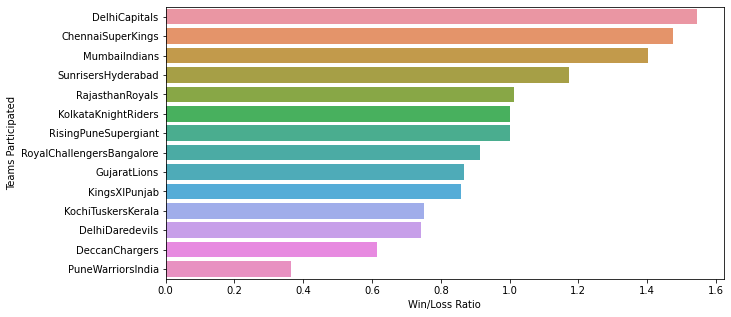

In [12]:
ipl = ipl.sort_values(by = 'wl_rate', ascending = False, inplace = False)

plt.figure(figsize = (10, 5))
sns.barplot(x = 'wl_rate', y = 'Team', data = ipl, orient = 'h')
plt.xlabel("Win/Loss Ratio")
plt.ylabel("Teams Participated");

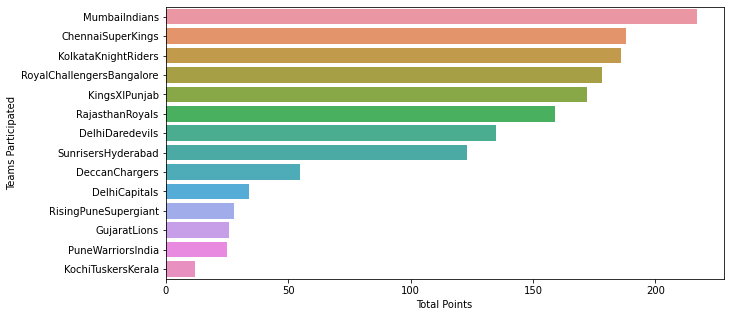

In [13]:
ipl = ipl.sort_values(by = 'Points', ascending = False, inplace = False)

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Points', y = 'Team', data = ipl, orient = 'h')
plt.xlabel("Total Points")
plt.ylabel("Teams Participated");

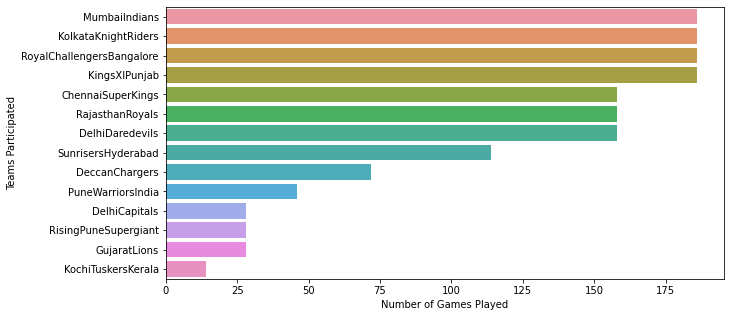

In [14]:
ipl = ipl.sort_values(by = 'Played', ascending = False, inplace = False)

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Played', y = 'Team', data = ipl, orient = 'h')
plt.xlabel("Number of Games Played")
plt.ylabel("Teams Participated");

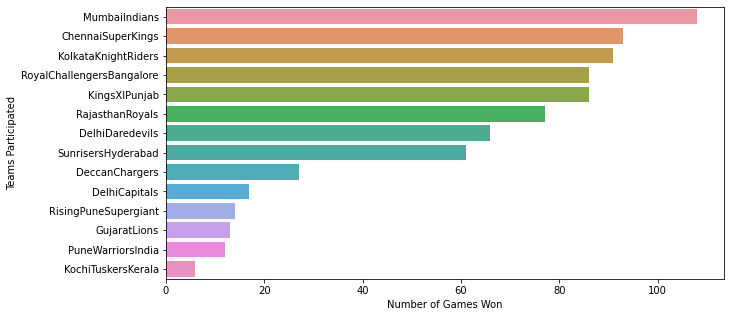

In [15]:
ipl = ipl.sort_values(by = 'Won', ascending = False, inplace = False)

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Won', y = 'Team', data = ipl, orient = 'h')
plt.xlabel("Number of Games Won")
plt.ylabel("Teams Participated");

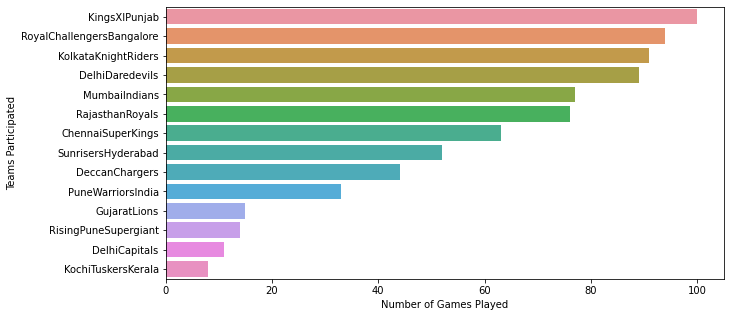

In [16]:
ipl = ipl.sort_values(by = 'Loss', ascending = False, inplace = False)

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Loss', y = 'Team', data = ipl, orient = 'h')
plt.xlabel("Number of Games Played")
plt.ylabel("Teams Participated");

In [17]:
df_ipl['wl_rate'] = df_ipl['Won'] / df_ipl['Loss']
df_ipl

,Index,Year,Team,Played,Won,Loss,Tie,Points,POFF Played,POFF Won,POFF Loss,Position,P-Points,O-Points,Rank,wl_rate
0,1,2008,RajasthanRoyals,14,11,3,0,22,2,2,0,1,80,80,1,3.666667
1,2,2008,KingsXIPunjab,14,10,4,0,20,2,1,1,3,60,60,3,2.500000
2,3,2008,ChennaiSuperKings,14,8,6,0,16,1,0,1,2,70,70,2,1.333333
3,4,2008,DelhiDaredevils,14,7,6,1,15,1,0,1,4,50,50,4,1.166667
4,5,2008,MumbaiIndians,14,7,7,0,14,0,0,0,5,40,40,5,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,104,2020,RoyalChallengersBangalore,14,7,7,0,14,1,0,1,4,50,550,4,1.000000
104,105,2020,KolkataKnightRiders,14,7,7,0,14,0,0,0,5,40,590,3,1.000000
105,106,2020,KingsXIPunjab,14,6,8,0,12,0,0,0,6,30,420,6,0.750000
106,107,2020,ChennaiSuperKings,14,6,8,0,12,0,0,0,7,20,720,2,0.750000


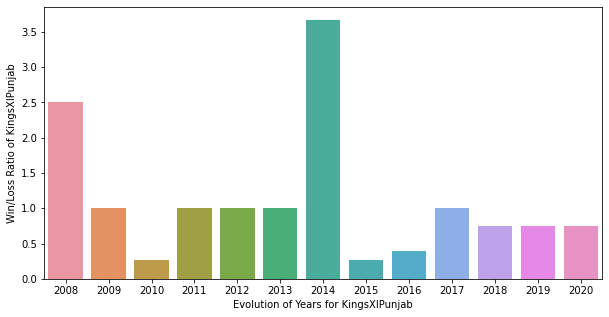

In [18]:
def yearly_trend(team_name):
    plt.figure(figsize = (10, 5))
    filtered_results = df_ipl[(df_ipl['Team']) == team_name]
    sns.barplot(x = filtered_results.Year, y = filtered_results.wl_rate, data = filtered_results, orient='v')
    plt.xlabel(f"Evolution of Years for {team_name}")
    plt.ylabel(f"Win/Loss Ratio of {team_name}")
yearly_trend('KingsXIPunjab')

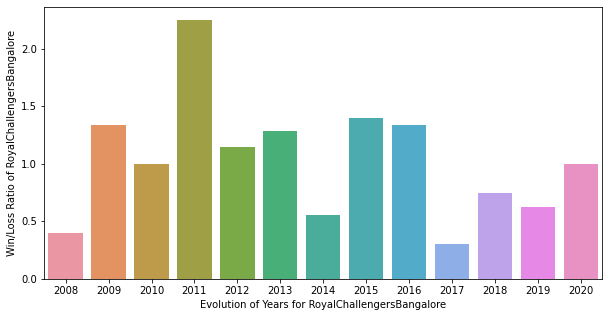

In [19]:
yearly_trend('RoyalChallengersBangalore')

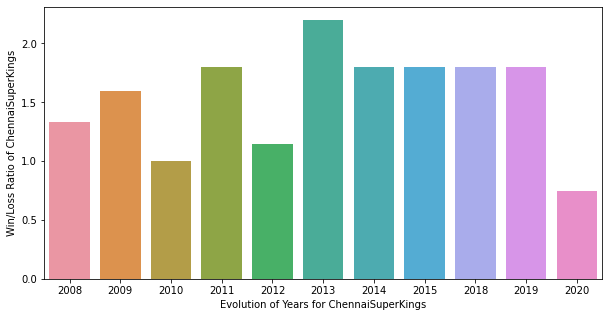

In [20]:
yearly_trend('ChennaiSuperKings')

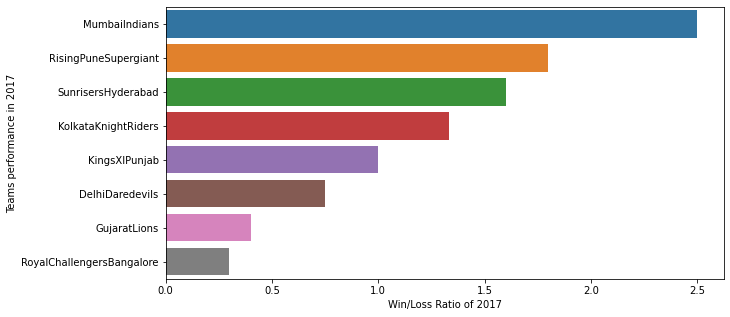

In [21]:
def performance_in(year):
    plt.figure(figsize = (10, 5))
    filtered_results = df_ipl[(df_ipl['Year']) == year]
    sns.barplot(y = filtered_results.Team, x = filtered_results.wl_rate, data = filtered_results, orient='h')
    plt.ylabel(f"Teams performance in {year}")
    plt.xlabel(f"Win/Loss Ratio of {year}")

performance_in(2017)

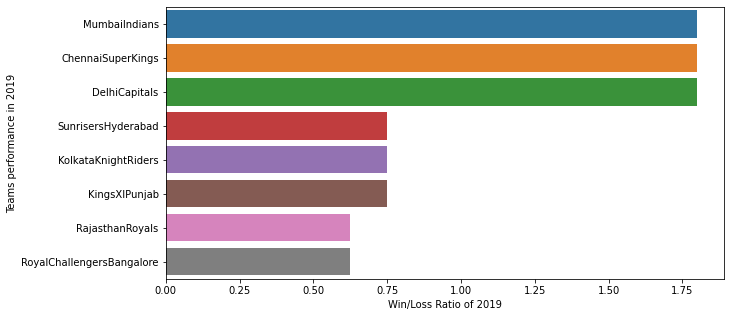

In [22]:
def performance_in(year):
    plt.figure(figsize = (10, 5))
    filtered_results = df_ipl[(df_ipl['Year']) == year]
    sns.barplot(y = filtered_results.Team, x = filtered_results.wl_rate, data = filtered_results, orient='h')
    plt.ylabel(f"Teams performance in {year}")
    plt.xlabel(f"Win/Loss Ratio of {year}")

performance_in(2019)

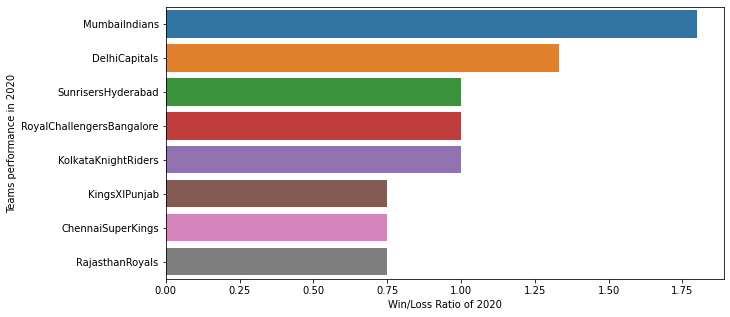

In [23]:
def performance_in(year):
    plt.figure(figsize = (10, 5))
    filtered_results = df_ipl[(df_ipl['Year']) == year]
    sns.barplot(y = filtered_results.Team, x = filtered_results.wl_rate, data = filtered_results, orient='h')
    plt.ylabel(f"Teams performance in {year}")
    plt.xlabel(f"Win/Loss Ratio of {year}")

performance_in(2020)